# Amazon - User-based Recommendation Model

## Exploratory Data Analysis

In [5]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
amazon_df = pd.read_csv("Data/data.csv")

In [7]:
amazon_df.head()

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AH3QC2PC1VTGP,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3LKP6WPMP9UKX,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVIY68KEPQ5ZD,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A1CV1WROP5KTTW,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
amazon_df.shape

(4848, 207)

In [9]:
amazon_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Movie1,1.0,5.000000,NaN,5.0,5.00,5.0,5.0,5.0
Movie2,1.0,5.000000,NaN,5.0,5.00,5.0,5.0,5.0
Movie3,1.0,2.000000,NaN,2.0,2.00,2.0,2.0,2.0
Movie4,2.0,5.000000,0.000000,5.0,5.00,5.0,5.0,5.0
Movie5,29.0,4.103448,1.496301,1.0,4.00,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...
Movie202,6.0,4.333333,1.632993,1.0,5.00,5.0,5.0,5.0
Movie203,1.0,3.000000,NaN,3.0,3.00,3.0,3.0,3.0
Movie204,8.0,4.375000,1.407886,1.0,4.75,5.0,5.0,5.0
Movie205,35.0,4.628571,0.910259,1.0,5.00,5.0,5.0,5.0


<AxesSubplot:ylabel='Frequency'>

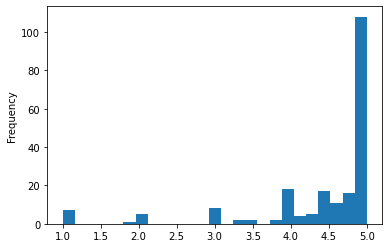

In [10]:
#Histogram of the mean frequency 
amazon_df.describe().T['mean'].plot(bins=25, kind='hist')

<AxesSubplot:ylabel='Frequency'>

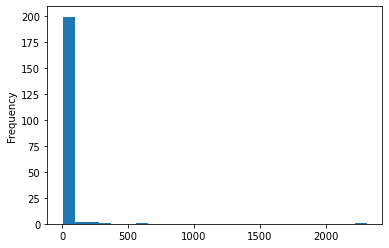

In [11]:
amazon_df.describe().T['count'].plot(bins=25, kind='hist')

In [12]:
#Which movies have the maximum views?
max_views = amazon_df.describe().T['count'].sort_values(ascending=False)[:1]
max_views

Movie127    2313.0
Name: count, dtype: float64

In [13]:
#Which movie has the highest ratings?
#ensure to drop nuisance column like user_id
high_rate = amazon_df.drop('user_id',axis=1).sum().sort_values(ascending=False)[:1]
high_rate


Movie127    9511.0
dtype: float64

In [14]:
#What is the average rating of each movie
avg_rating = amazon_df.drop('user_id',axis=1).mean()
avg_rating

Movie1      5.000000
Movie2      5.000000
Movie3      2.000000
Movie4      5.000000
Movie5      4.103448
              ...   
Movie202    4.333333
Movie203    3.000000
Movie204    4.375000
Movie205    4.628571
Movie206    4.923077
Length: 206, dtype: float64

In [15]:
#What are the top 5 movies and their maximum ratings
top_5 = amazon_df.describe().T['count'].sort_values(ascending=False)[0:5]
top_5

Movie127    2313.0
Movie140     578.0
Movie16      320.0
Movie103     272.0
Movie29      243.0
Name: count, dtype: float64

In [16]:
#What are the top 5 movies with the least number of views
bottom_5 = amazon_df.describe().T['count'].sort_values(ascending=True)[0:5]
bottom_5

Movie1      1.0
Movie71     1.0
Movie145    1.0
Movie69     1.0
Movie68     1.0
Name: count, dtype: float64

## Recommendation Model

In [20]:
#Data Cleansing
#set index to user ID and make it numerical 
df2 = amazon_df.set_index(pd.Index(list(range(1,4849))))
df3 = df2.drop('user_id', axis=1)
#reset index so that user ID becomes part of the dataframe
df4 = df3.rename_axis ('user_id').reset_index()

#Pivot data 
df_unpivoted = df4.melt(id_vars=['user_id'], var_name='movie', value_name='ratings')

#Change data type of movie column to a numerical value -  first change movie - object to a string, then remove move from column, change data type to int
df_unpivoted['movie'] =  df_unpivoted['movie'].astype('string')
df_unpivoted['movie'] = df_unpivoted['movie'].str.replace('Movie', '')
df_unpivoted['movie'] =  df_unpivoted['movie'].astype('int')
df_unpivoted

,user_id,movie,ratings
0,1,1,5.0
1,2,1,NaN
2,3,1,NaN
3,4,1,NaN
4,5,1,NaN
...,...,...,...
998683,4844,206,5.0
998684,4845,206,5.0
998685,4846,206,5.0
998686,4847,206,5.0


In [15]:
from sklearn.model_selection import train_train_split

ImportError: cannot import name 'train_train_split' from 'sklearn.model_selection' (C:\Users\Jas Pinglia\anaconda3\lib\site-packages\sklearn\model_selection\__init__.py)

In [21]:
n_users = df_unpivoted.user_id.unique().shape[0]
n_movies = df_unpivoted.movie.unique().shape[0]
# split the data into test and train
train_data,test_data = train_test_split(df_unpivoted,test_size=0.25)

NameError: name 'train_test_split' is not defined

In [22]:
n_users

4848

In [23]:
n_movies

206

In [24]:
train_data.shape

NameError: name 'train_data' is not defined

In [25]:
#populate the train and test sets with ratings such that the user_id index - movie Id index equals the given rating

for line in train_data.itertuples():
   train_data_matrix[line[1]-1,line[2]-1] = line[3]
train_data_matrix

NameError: name 'train_data' is not defined

In [26]:
#Do the same for the test set
test_data_matrix = np.zeros((n_users,n_movies))
for line in test_data.itertuples():
   test_data_matrix[line[1]-1, line[2]-1] = line[3]
test_data_matrix

NameError: name 'test_data' is not defined

In [ ]:
from  sklearn.metrics import pairwise_distances

user_similarity = pairwise_distances(train_data_matrix,metric ='cosine')
#movie_similarity = pairwise_distances(train_data_matrix.T,metric ='cosine')
#mean_user_rating = train_data_matrix.mean(axis=1)[:,np.newaxis]
#ratings_diff = (train_data_matrix - mean_user_rating)
#user_pred = mean_user_rating + user_similarity.dot(rating_diff)/np.array([np.abs(user_similarity).sum(axis=1)]).T

#user_pred

freq_watch = np.sum(test_data.notna())

freq_watch.sort_values(ascending = False)

avg_score = np.divide(sum_score, freq_watch)
